In [1]:
import pandas as pd

# Create a DataFrame
df = pd.read_csv("diameters.txt", sep='\t', header=None, 
                 names=['Date', 'Value', 'Code', 'Product', 'Batch'])

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Display the first few rows of the DataFrame
print(df.head())

# Display info about the DataFrame
print(df.info())

        Date  Value Code Product  Batch
0 1998-05-01   3.98  DRJ    A386      1
1 1998-05-01   4.26  DRJ    A386      1
2 1998-05-01   4.62  DRJ    A386      1
3 1998-05-01   3.98  DRJ    A386      1
4 1998-05-01   4.64  DRJ    A386      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     240 non-null    datetime64[ns]
 1   Value    240 non-null    float64       
 2   Code     240 non-null    object        
 3   Product  240 non-null    object        
 4   Batch    240 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 9.5+ KB
None


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

def control_plot(Y1=None,Y2=None,bar1=None,
                 ucl1=None,lcl1=None,bar2=None,
                 ucl2=None,lcl2=None,xLabels=None,
                 print_out=True, max_label_num=25,
                 ylabel1="",ylabel2=""):

    if print_out:
        print(ylabel1)
        print("LCL=%.2f\tmean = %.2f\tUCL=%.2f"%(
                lcl1,bar1,ucl1))
        print(ylabel2)
        print("LCL=%.2f\tmean = %.2f\tUCL=%.2f"%(
                lcl2,bar2,ucl2))

    fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)
    # Remove vertical space between Axes
    fig.subplots_adjust(hspace=0)

    axs[0].plot(Y1, linestyle='-', marker='o', color='black')
    axs[0].axhline(bar1                    , color='blue')
    axs[0].axhline(ucl1     , color = 'red', linestyle = 'dashed')
    axs[0].axhline(lcl1     , color = 'red', linestyle = 'dashed')

    axs[0].set(ylabel=ylabel1)

    axs[1].plot(Y2, linestyle='-', marker='o', color='black')
    axs[1].axhline(bar2     , color='blue')
    axs[1].axhline(ucl2        , color='red', linestyle ='dashed')
    axs[1].axhline(lcl2        , color='red', linestyle ='dashed')
    axs[1].set_ylim(bottom=0)

    axs[1].set(ylabel=ylabel2)
    if xLabels is not None:
        step=1
        if len(xLabels)>max_label_num:
            step=int(len(xLabels)/max_label_num+1)
        axs[1].set_xticks(range(len(xLabels)),xLabels,
                         rotation='vertical')
        axs[1].set_xticks(axs[1].get_xticks()[::step])
  
    plt.show()

def x_mR(x,print_out=True,xLabels=None,
        max_xlabels=25):

    # Define list variable for moving ranges
    MR = [np.nan]
    for i in range(1, len(x)):
        MR.append(abs(x[i] - x[i-1]))

    x_bar=stat.mean(x)
    R_bar=stat.mean(MR[1:])
#     E2=3/d2, when n=2 two numbers for range, E2=2.659
    E2=2.659
    x_UCL=x_bar + E2* R_bar
    x_LCL=x_bar - E2* R_bar
    
    # while n=2, D4=3.267
    D4=3.267
    R_UCL=D4* R_bar
    R_LCL=0
    
    control_plot(Y1=x,Y2=MR,bar1=x_bar,ucl1=x_UCL,
                ucl2=R_UCL,lcl1=x_LCL,lcl2=R_LCL,
                bar2=R_bar,xLabels=xLabels,
                print_out=print_out,
                ylabel1="Individual Values",
                ylabel2="Moving Range (n=2)",
                max_label_num=max_xlabels)
    

Individual Values
LCL=3.54	mean = 4.34	UCL=5.13
Moving Range (n=2)
LCL=0.00	mean = 0.30	UCL=0.98


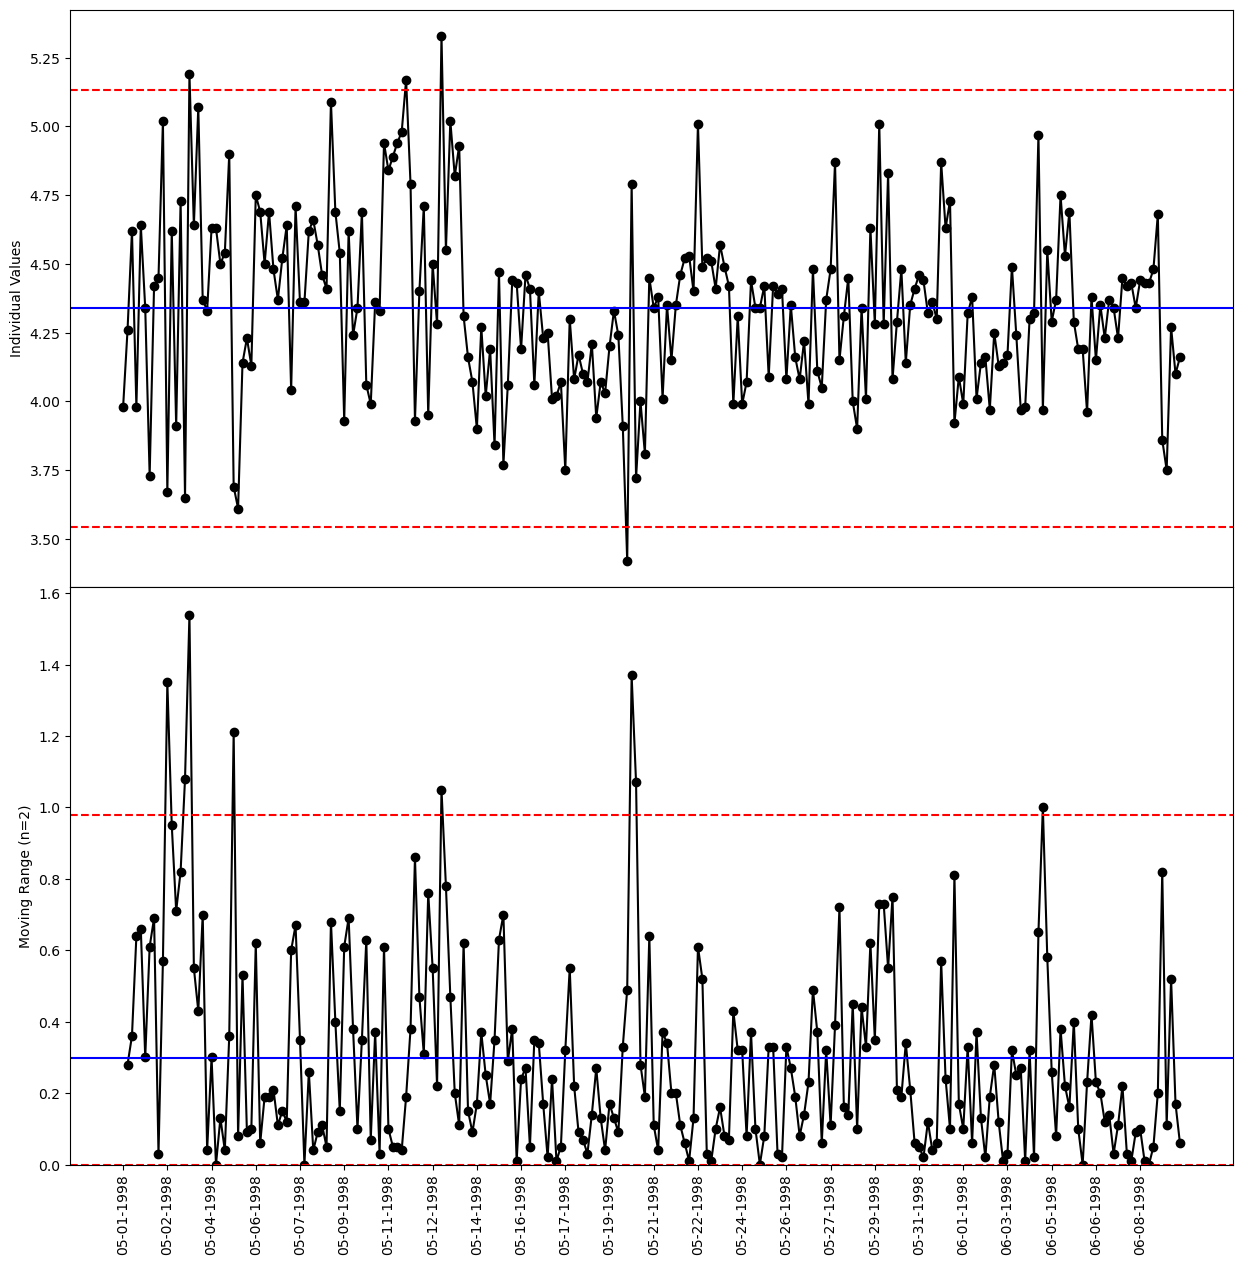

In [18]:
x_mR(list(df["Value"]),
     xLabels=[_.strftime('%m-%d-%Y') for _ in df["Date"]])

In [22]:
# Ctrl_Cht_Const = pd.read_csv("control chart constants.txt", sep=' ')
from ctrl_chart_const import df as Ctrl_Cht_Const

# the number of samples each day need be consistent over time
# It's a sampling process not all the products each day.
# otherwise can't estimate an A2 value for UCL and LCL 

def xBar_R(data,print_out=True,max_xlabels=25,
          xLabels=None):
    
    xbar=[stat.mean(l) for l in data]
    R=[max(l)-min(l) for l in data]
    n=len(data[0])
    A2=Ctrl_Cht_Const["A2"][n]
    xbar_bar=stat.mean(xbar)
    R_bar=stat.mean(R)
    xbar_ucl=xbar_bar+A2*R_bar
    xbar_lcl=xbar_bar-A2*R_bar
    D4=Ctrl_Cht_Const["D4"][n]
    D3=Ctrl_Cht_Const["D3"][n]
    R_UCL=D4*R_bar
    R_LCL=D3*R_bar    

    if print_out:
        print("n = %d"%n)
        
    control_plot(Y1=xbar,Y2=R,bar1=xbar_bar,ucl1=xbar_ucl,
                ucl2=R_UCL,lcl1=xbar_lcl,lcl2=R_LCL,
                bar2=R_bar,xLabels=xLabels,
                print_out=print_out,
                ylabel1="X Bar",
                ylabel2="Range",
                max_label_num=max_xlabels)
    
def xBar_S(data,print_out=True,max_xlabels=25,
          xLabels=None):
    
    xbar=[stat.mean(l) for l in data]
    S=[stat.stdev(l) for l in data]
    n=len(data[0])
    A3=Ctrl_Cht_Const["A3"][n]
    xbar_bar=stat.mean(xbar)
    S_bar=stat.mean(S)
    xbar_ucl=xbar_bar+ A3 * S_bar
    xbar_lcl=xbar_bar- A3 * S_bar
    B4=Ctrl_Cht_Const["B4"][n]
    B3=Ctrl_Cht_Const["B3"][n]
    S_UCL=B4*S_bar
    S_LCL=B3*S_bar    
    
    if print_out:
        print("n = %d"%n)
    
    control_plot(Y1=xbar,Y2=S,bar1=xbar_bar,ucl1=xbar_ucl,
                ucl2=S_UCL,lcl1=xbar_lcl,lcl2=S_LCL,
                bar2=S_bar,xLabels=xLabels,
                print_out=print_out,
                ylabel1="X Bar",
                ylabel2="Stdev",
                max_label_num=max_xlabels)


n = 6
X Bar
LCL=4.03	mean = 4.34	UCL=4.65
Range
LCL=0.00	mean = 0.63	UCL=1.27


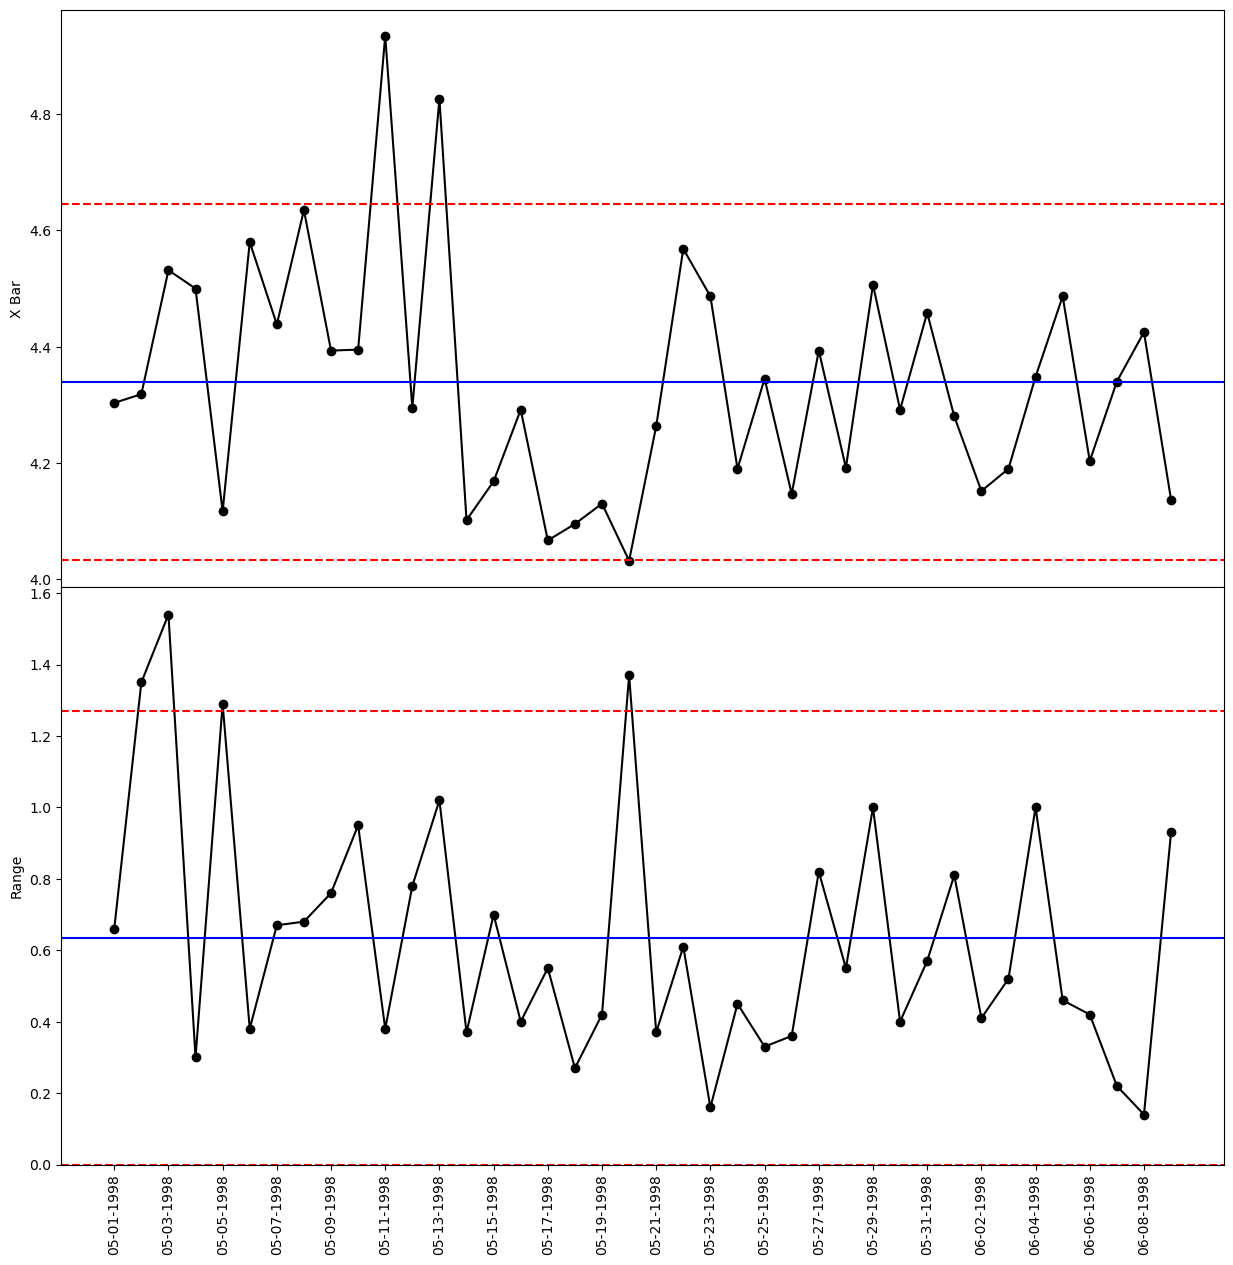

In [23]:
def group_df_to_list(df,y_key="Value",grp_key="Date"):
    return [list(df[df[grp_key]==gid][y_key])
           for gid in df[grp_key].unique() ]
    
xBar_R(group_df_to_list(df,y_key="Value", grp_key="Date"),
     xLabels=[i.strftime('%m-%d-%Y') for i in df["Date"].unique()])

n = 6
X Bar
LCL=4.03	mean = 4.34	UCL=4.65
Stdev
LCL=0.01	mean = 0.24	UCL=0.48


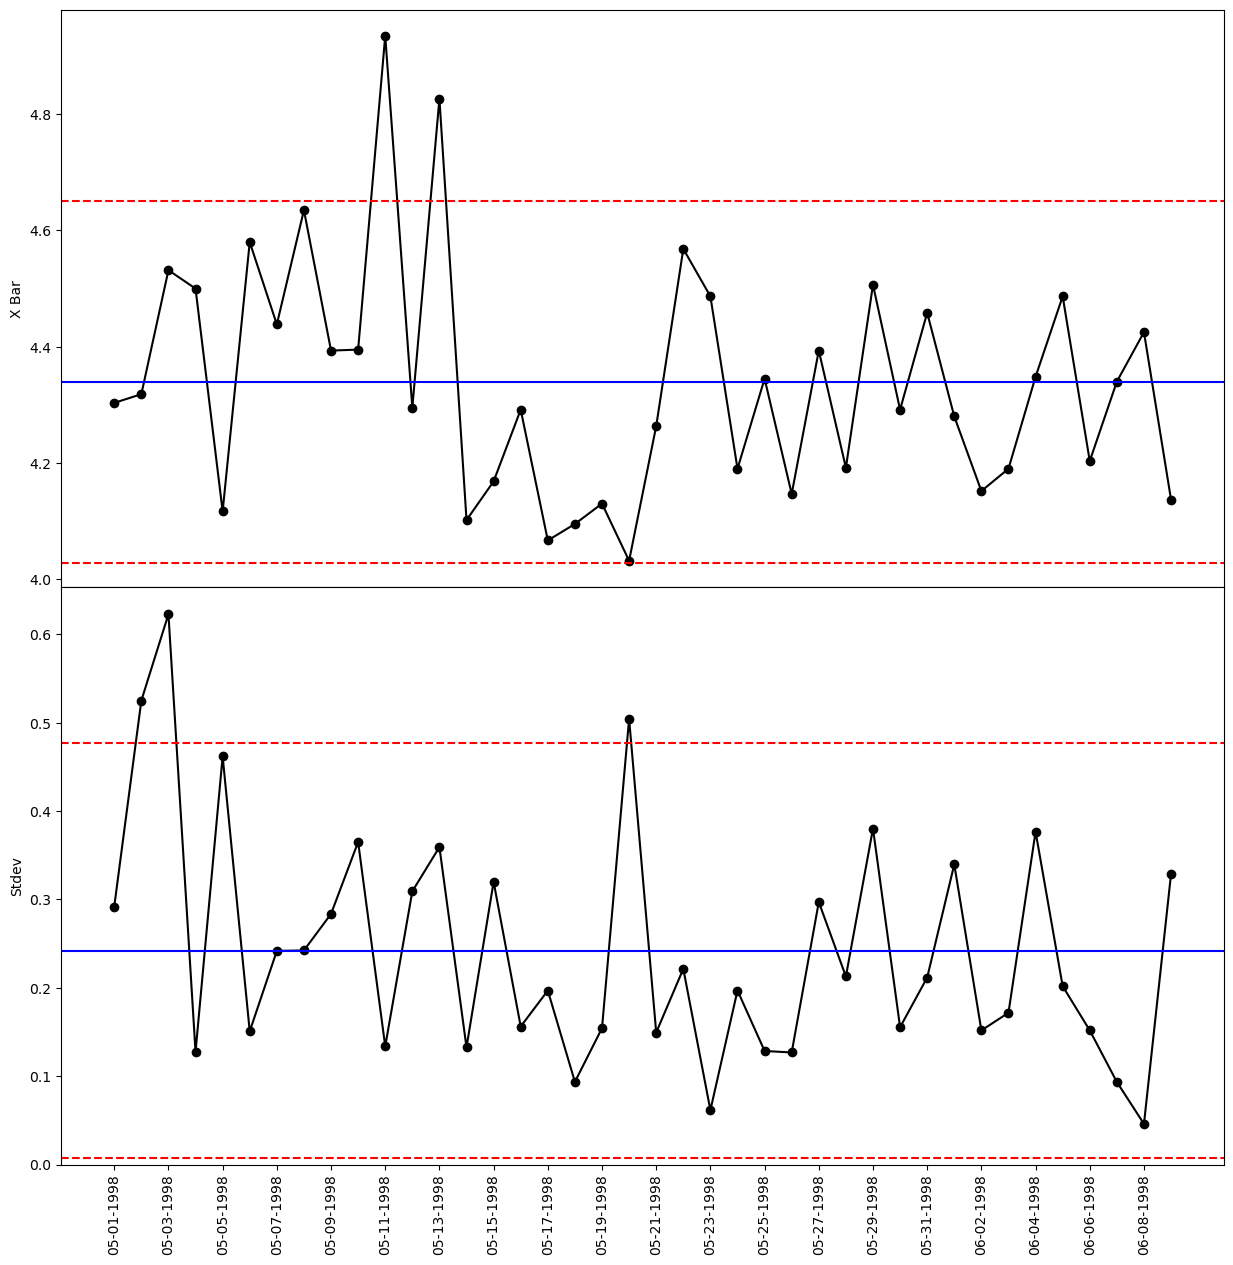

In [24]:
xBar_S(group_df_to_list(df,y_key="Value", grp_key="Date"),
     xLabels=[i.strftime('%m-%d-%Y') for i in df["Date"].unique()])

In [80]:
def p_np_plot(p=None,n=1,
              bar1=None,ucl1=None,lcl1=None,xLabels=None,
              print_out=True, max_label_num=25,
              ylabel="P"):
    
    if isinstance(n, int):
        nlist=[n]*len(p)
    else:
        nlist=n
    
    p_bar = sum([i*j for i,j in zip(p,nlist)])/sum(nlist)
    ucl_list = [p_bar+3*(p_bar*(1-p_bar)/i)**.5 for i in nlist]
    lcl_list = [max(0,p_bar-3*(p_bar*(1-p_bar)/i)**.5) for i in nlist]
        
#     print(p_bar,nlist,ucl_list,lcl_list)
    xs=[-.5]
    for _ in range(len(p)):
        xs.append(xs[-1]+1)
        xs.append(xs[-1])
    xs=xs[:-1]
    
    lcl_ys, ucl_ys=[],[]
    for ucl in ucl_list:
        ucl_ys.append(ucl)
        ucl_ys.append(ucl)
    for lcl in lcl_list:
        lcl_ys.append(lcl)
        lcl_ys.append(lcl)
        
    
    fig, ax = plt.subplots(1, figsize=(15,15))

    ax.plot(p, linestyle='-', marker='o', color='black')
    
    if bar1 is not None:
        p_bar = bar1
    ax.axhline(p_bar, color='blue')
    
    if ucl1 is not None:
        ax.axhline(ucl1, color = 'red', linestyle = 'dashed')
    else:
        ax.plot(xs, ucl_ys, color='red')
    if lcl1 is not None:
        ax.axhline(lcl1, color = 'red', linestyle = 'dashed')
    else:
        ax.plot(xs, lcl_ys, color='red')
        
    ax.set(ylabel=ylabel)

    if xLabels is not None:
        step=1
        if len(xLabels)>max_label_num:
            step=int(len(xLabels)/max_label_num+1)
        ax.set_xticks(range(len(xLabels)),xLabels,
                         rotation='vertical')
        ax.set_xticks(ax.get_xticks()[::step])
  
    plt.show()
    
    if print_out:
        print(ylabel)
        print("mean = %.4f"%(p_bar))

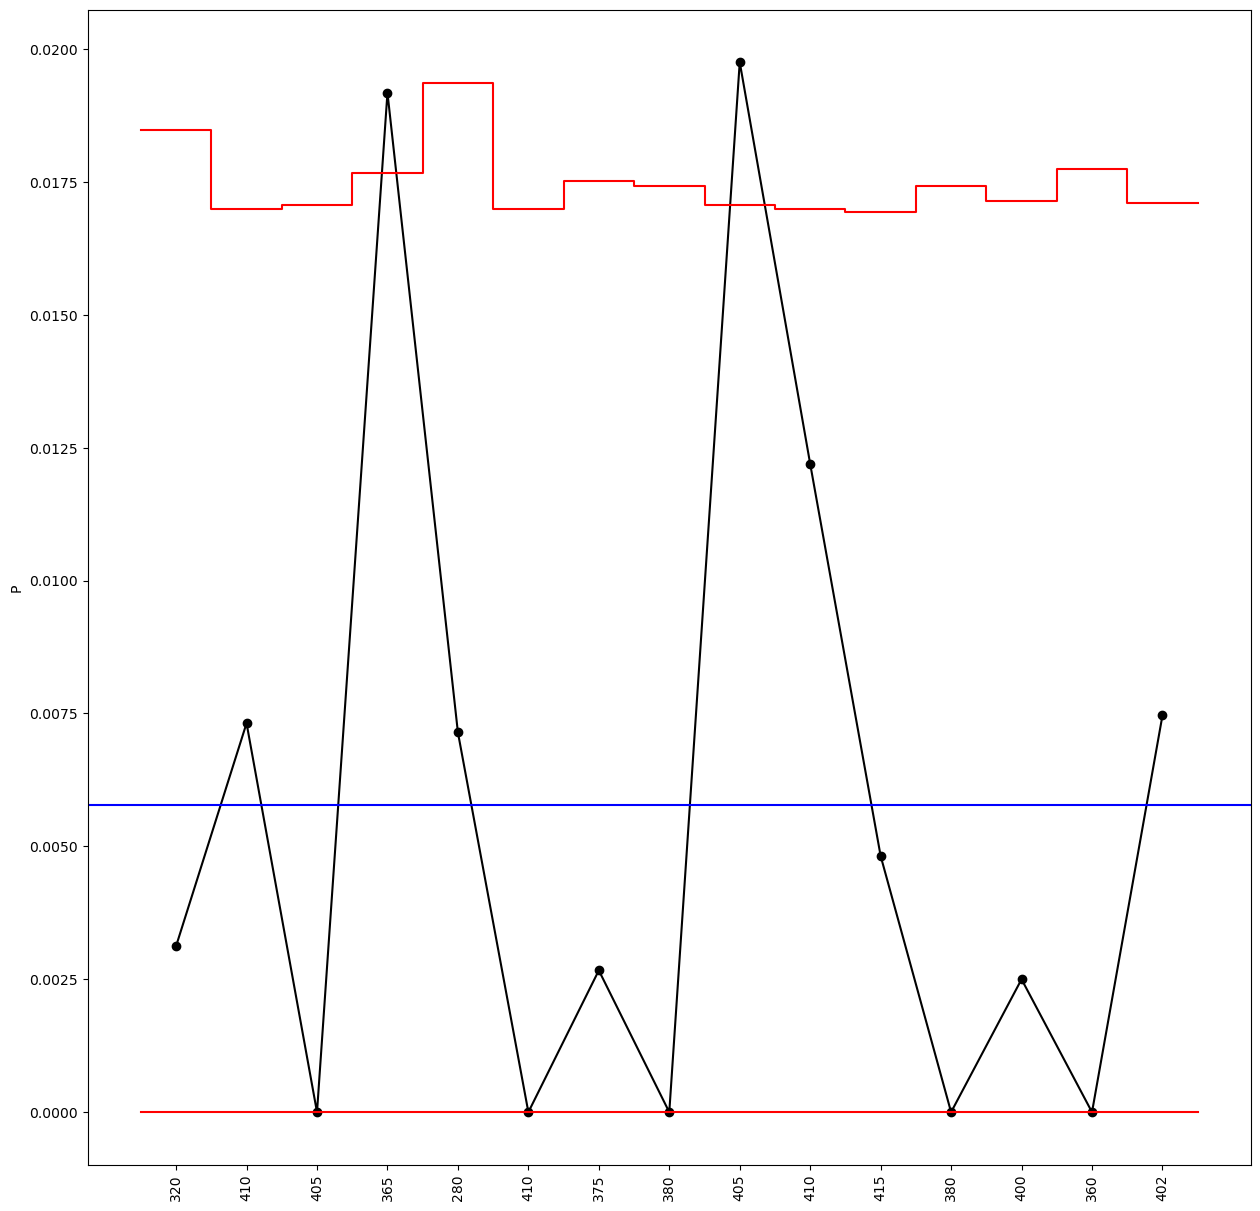

P
mean = 0.0058


In [81]:
data = {
    'Sample': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Target': [400] * 15,
    'Actual': [320, 410, 405, 365, 280, 410, 375, 380, 405, 410, 415, 380, 400, 360, 402],
    'Defects': [1, 3, 0, 7, 2, 0, 1, 0, 8, 5, 2, 0, 1, 0, 3]
}

p_np_plot(p=[i/j for i,j in zip(data["Defects"],data["Actual"])],
          n=data["Actual"],xLabels=[str(i) for i in data["Actual"]])


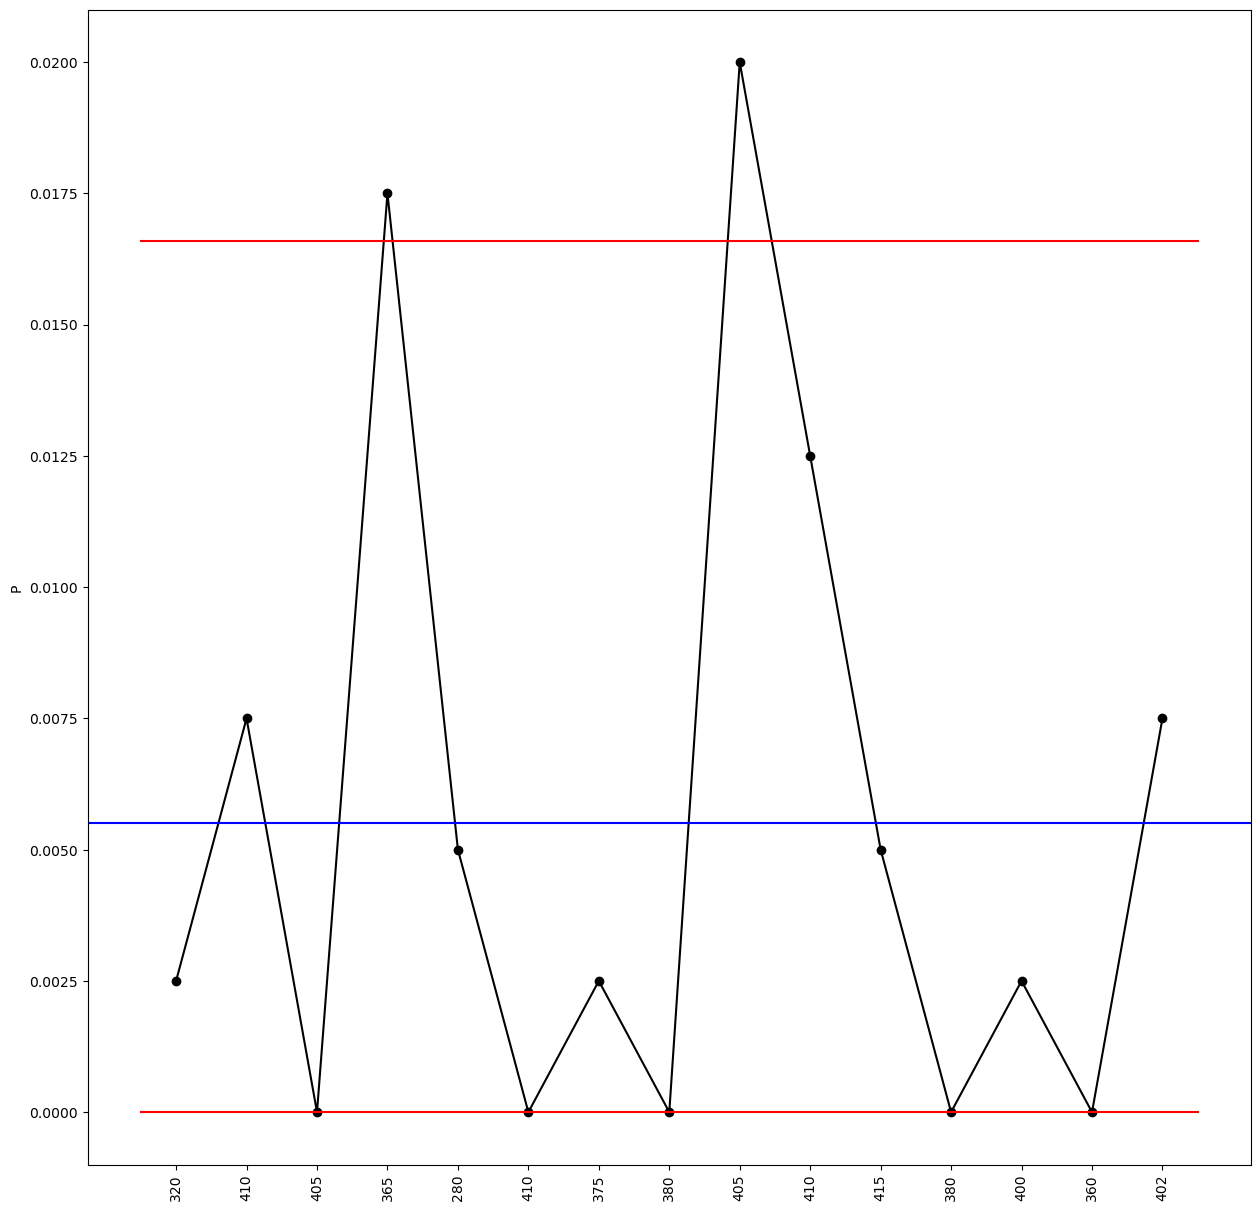

P
mean = 0.0055


In [82]:

p_np_plot(p=[i/j for i,j in zip(data["Defects"],data["Target"])],
          n=400,xLabels=[str(i) for i in data["Actual"]])